<h1>Analyzing a Portfolio</h1>
<h4>In this lesson we will take a hypothetical portfolio of stocks and analyze it by calculating some important metrics.</h4>

In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

<h4>First, let's define our portfolio. As an example, let's create our portfolio as 30% Apple, 20% Amazon, 40% Microsoft and 10% Tesla.</h4>
<p>We will define the stock tickers and the portfolio weights using arrays:</p>

In [2]:
stocks = ['AAPL', 'AMZN', 'MSFT', 'TSLA']
weights = [0.3, 0.2, 0.4, 0.1]

<h4>Now, when we have the arrays defined, we can get the stock prices and calculate the portfolio returns:</h4>

In [3]:
data = yf.download(stocks, start='2021-01-01')

#daily returns
x = data['Close'].pct_change()

#portfolio return
ret = (x * weights).sum(axis = 1)

#total cumulative returns for our portfolio
cumulative = (ret + 1).cumprod() 

display(cumulative)

[*********************100%%**********************]  4 of 4 completed


Date
2021-01-04    1.000000
2021-01-05    1.006828
2021-01-06    0.984063
2021-01-07    1.014647
2021-01-08    1.029021
                ...   
2024-06-17    1.676777
2024-06-18    1.663629
2024-06-20    1.654965
2024-06-21    1.662452
2024-06-24    1.658834
Length: 873, dtype: float64

<p>To get the daily portfolio returns, we multiplied the daily returns by the weights and calculated the sum of the results.</p>

<h4>Plotting the cumulative returns will give us a better understanding of the data:</h4>

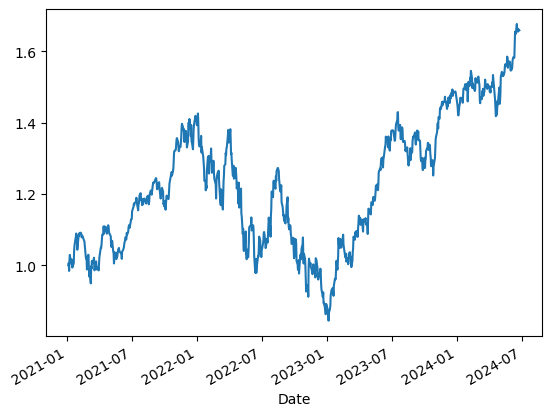

In [4]:
cumulative.plot()
plt.show()

<p>The chart shows how our portfolio performs in the period.</p>

<h4>Next, we will calculate the volatility of our portfolio.</h4>
<p>Volatility is also often used to measure risk. If a stock is very volatile, you can expect large changes in its price and therefore a higher risk.<br/>
Volatility is calculated using the standard deviation of the portfolio return.</p>

<h4>We can calculate the daily volatility by simply using the NumPy std function on our daily returns:</h4>

In [5]:
#portfolio return
ret = (x * weights).sum(axis = 1)

print("The volatility of our portfolio is: ", np.std(ret))

The volatility of our portfolio is:  0.016618722583307557


<h4>We can also calculate the annual volatility by taking the square root of the number of trading days in a year (252) and multiply it by the daily volatility:</h4>

In [6]:
annual_std = np.std(ret) * np.sqrt(252)
print("The annual volatility of our portfolio is: ", np.std(ret))

The annual volatility of our portfolio is:  0.016618722583307557


<h4>The annual volatility represents the risk % of our portfolio.</h4>

<p>np.sqrt() is used to calculate the square root of a given number.</p>

<h4>Another important metric is the Sharpe ratio.</h4>
<p>Sharpe ratio is the measure of the risk-adjusted return of a portfolio. A portfolio with a higher Sharpe ratio is considered better.</p>

<p>To calculate the Sharpe ratio, we need to take the average return and divide it by the volatility.</p>

In [7]:
sharpe = (np.mean(ret) / np.std(ret))*np.sqrt(252)
print("The sharpe ratio of our portfolio is: ", sharpe)

The sharpe ratio of our portfolio is:  0.6858779571413006


<p>We multiplied the result by the square root of 252 to annualize the Sharpe ratio. (There are 252 trading days in a year)</p>
<p>Sharpe ratios greater than 1 are considered optimal.</p>